<a href="https://colab.research.google.com/github/Morpheus054/Basic_DS/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA SCIENCE

# DS1

In [ ]:
#WEB SCRAPING - BEAUTIFUL SOUP
#url: https://www.amazon.ae/SAMSUNG-Galaxy-Android-Smartphone-Phantom/product-reviews/B09NRV6WZD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
url = 'https://www.amazon.ae/SAMSUNG-Galaxy-Android-Smartphone-Phantom/product-reviews/B09NRV6WZD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
page = requests.get(url)
page #<Response [200]> is okay, but <Response[503]> is an error - try rerunning your cell unitl you get <Response[200]>
#Even after trying multiple times, if Response[200] is not printed, then check your url

<Response [200]>

In [ ]:
#ALWAYS IGNORE TOP POSITIVE AND TOP CRITICAL REVIEW
#There are 10 reviews in the customer review page

In [ ]:
page.content
#here we have got the source code of the Amazon customer page
#But the source is jumbled and not in readable format

b'<!doctype html><html lang="en-ae" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.cs

In [ ]:
soup = bs(page.content, 'html.parser')
#html.parser converts the html code into better readable format
soup

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-ae"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxw

In [ ]:
#Now let us consider the review names
names = soup.find_all('span',class_ = 'a-profile-name')[2:] #because we are ignoring top positive and top critical reviews
names

[<span class="a-profile-name">Rahul Raj</span>,
 <span class="a-profile-name">A. Salik</span>,
 <span class="a-profile-name">marion arion</span>,
 <span class="a-profile-name">Rami Hammoud</span>,
 <span class="a-profile-name">Maiden</span>,
 <span class="a-profile-name">Anya</span>,
 <span class="a-profile-name">Wissam</span>,
 <span class="a-profile-name">Haitham</span>,
 <span class="a-profile-name">swaraj paul</span>,
 <span class="a-profile-name">shashi</span>]

In [ ]:
#Now let us create a dataframe using the data from the names list
import pandas as pd
df = pd.DataFrame(names,columns = {'Customer Name'})
df

,Customer Name
0,Rahul Raj
1,A. Salik
2,marion arion
3,Rami Hammoud
4,Maiden
5,Anya
6,Wissam
7,Haitham
8,swaraj paul
9,shashi


In [ ]:
#Next is review title 
r_title = soup.find_all('a', class_ = 'review-title')
r_title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3M96CA21A43BH?ASIN=B09NRV6WZD">
 <span>Excellent</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R29TE9AD6ZYDKW?ASIN=B09NRV6WZD">
 <span>Phone is fine but HMS not supported</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1TF4W63ULJA78?ASIN=B09NRV6WZD">
 <span>Cames with pods and it works perfectly I love it</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RX0L30PC0YBTN?ASIN=B09NRV6WZD">
 <span>Great phone, Great price, but not complete</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a

In [ ]:
#Data cleaning or Data Filtering
review_title = [] #empty list

for i in range(0,len(r_title)):
  review_title.append(r_title[i].get_text()[1:-1])

review_title

['Excellent',
 'Phone is fine but HMS not supported',
 'Cames with pods and it works perfectly I love it',
 'Great phone, Great price, but not complete',
 'Great product',
 'Battery',
 'No free buds received',
 'Suspicious',
 'Utter failure pathetic shopping experience.',
 '\u200eUSB-C Data cable, Travel Adapter, , SIM Tray pin nothing was there']

In [ ]:
#Next is review date
dates = soup.find_all('span', class_ = 'review-date')[2:]
dates

[<span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 10 January 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 27 November 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 27 November 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 5 January 2023</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 10 December 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab Emirates 🇦🇪 on 7 December 2022</span>,
 <span class="a-size-base a-color-secondary review-date" data-hook="review-date">Reviewed in the United Arab E

In [ ]:
#Data Cleaning
review_date = [] #empty list
for i in range(0,len(dates)):
  review_date.append(dates[i].get_text().replace('Reviewed in the United Arab Emirates 🇦🇪 on ',''))
review_date

['10 January 2023',
 '27 November 2022',
 '27 November 2022',
 '5 January 2023',
 '10 December 2022',
 '7 December 2022',
 '29 September 2022',
 '27 December 2022',
 '8 January 2023',
 '1 December 2022']

In [ ]:
df['Review title'] = review_title
df['Review dates'] = review_date
df

,Customer Name,Review title,Review dates
0,Rahul Raj,Excellent,10 January 2023
1,A. Salik,Phone is fine but HMS not supported,27 November 2022
2,marion arion,Cames with pods and it works perfectly I love it,27 November 2022
3,Rami Hammoud,"Great phone, Great price, but not complete",5 January 2023
4,Maiden,Great product,10 December 2022
5,Anya,Battery,7 December 2022
6,Wissam,No free buds received,29 September 2022
7,Haitham,Suspicious,27 December 2022
8,swaraj paul,Utter failure pathetic shopping experience.,8 January 2023
9,shashi,"‎USB-C Data cable, Travel Adapter, , SIM Tray ...",1 December 2022


# DS2

In [ ]:
#FORECASTING - FBPROPHET - FACEBOOK
#FORECASTING - PREDICTING SOMETHING WITH RESPECT TO TIME USING THE PAST AND PRESENT DATA 
#FORECASTING - VEGETABLE PRICES
#Dataset - nhrdf.org
#1 quintal - 100 kgs, 1 ton - 1000 kgs

In [ ]:
#Take the data and create dataframe
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df #-1 here considers the table with index -1 i.e. last table in the list of tables

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [ ]:
df.size #tells us the total number of elements in dataframe

25134

In [ ]:
df.info() #It tells us the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [ ]:
#to check the null values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#Now let us drop the null values
df = df.dropna()

In [ ]:
#FB PROPHET - It only takes data in form of 2 columns - ds and y - COMPULSORY 
#So rename the Date column as ds and rename the Modal Price as y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [ ]:
#Let us create a new datafram and consider only 2 column - ds and y from old datafram
df1 = df[['ds','y']]
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [ ]:
#The datatype of the ds column is in object/string format. Convert it to datetime format
#The datatype of the y column is in object/string format. Convert it to integer format
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = df1['y'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


<ipython-input-37-74fdebcff2bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds'] = pd.to_datetime(df1['ds'])
<ipython-input-37-74fdebcff2bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df1['y'].astype(int)


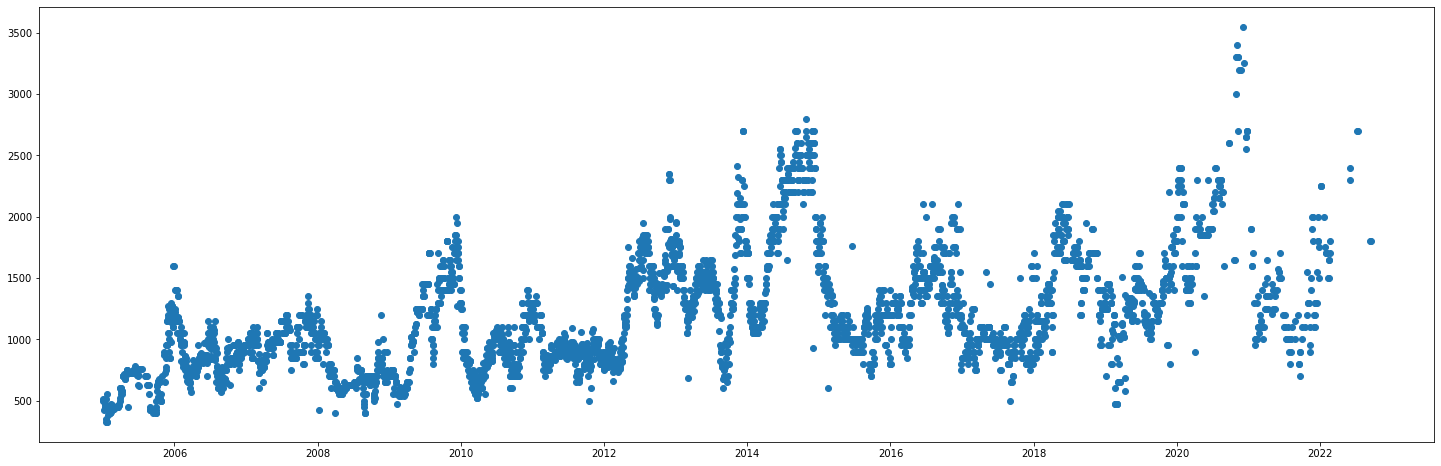

In [ ]:
#VISUALIZATION
import matplotlib.pyplot as plt
plt.figure(figsize = (25,8)) #just increasing the figure size
plt.scatter(df1['ds'],df1['y'])

In [ ]:
#FB PROPHET
import prophet
op = prophet.Prophet()

In [ ]:
op.fit(df1) #We are plotting the values of df1 in Fb prophet library

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1vwult3/4bfi_0cl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1vwult3/f9n8_wts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46212', 'data', 'file=/tmp/tmpn1vwult3/4bfi_0cl.json', 'init=/tmp/tmpn1vwult3/f9n8_wts.json', 'output', 'file=/tmp/tmpn1vwult3/prophet_model171scujd/prophet_model-20230204175641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = op.make_future_dataframe(periods = 1000, freq = 'D')
forecast = op.predict(forecast)

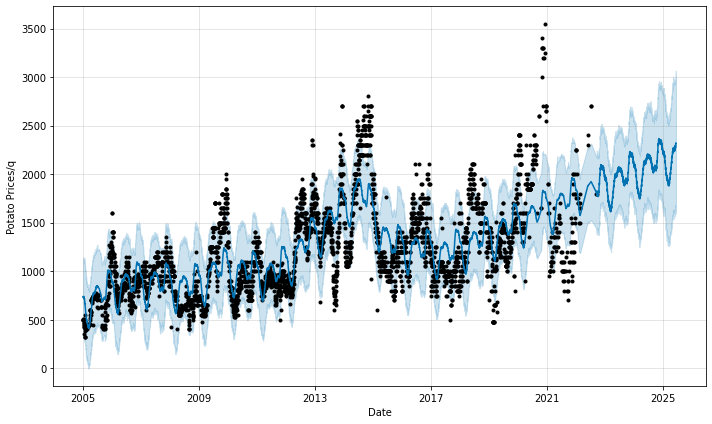

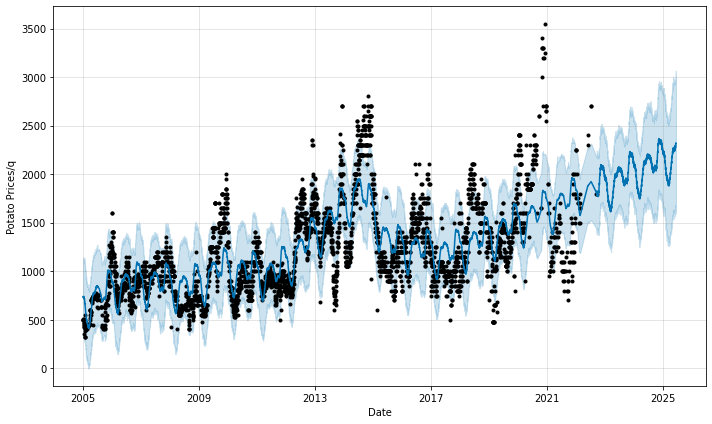

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Potato Prices/q')
#The black dots - Actual points of Potato prices(1st jan 2005 - 17th sep 2022)
#Light blue shade - It is the minimum and maximum price as predicted by our model
#Dark blue Line - Best fit line